In [1]:
%pip install numpy==1.26.4
%pip install torch
%pip install torchvision
%pip install tensorflow
%pip install tensorrt
%pip install matplotlib
%pip install IPython
%pip install scikit-learn



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\wongs\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\wongs\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\wongs\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\wongs\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\wongs\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\wongs\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\wongs\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\wongs\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:


import tensorflow as tf
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Load the TensorBoard notebook extension
# !pip install notebook
# !pip install jupyter-tensorboard
from torch.utils.tensorboard import SummaryWriter

import tensorrt
import datetime, os
from tensorflow.keras.callbacks import TensorBoard
%load_ext tensorboard





# set device



cuda


In [3]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score

In [4]:
from sklearn.preprocessing import StandardScaler 

In [5]:
subjectList = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32']
data_all = []
labels_all = []
data_scaled = []
ss = StandardScaler()

with open('C:/Users/wongs/OneDrive/Documents/dissertation/DREAMER/DREAMER_raw' + '.npy', 'rb') as file:
    sub = np.load(file, allow_pickle=True)
    data = [item[0] for item in sub]
    labels = [item[1] for item in sub]
    data_all.extend(data)
    labels_all.extend(labels)

data = np.array(data_all)
data = data.reshape(-1,14,256)


for i in range(data.shape[0]):
    data_i = data[i].T
    data_i = ss.fit_transform(data_i)
    data_scaled.append(data_i)
data_scaled = np.array(data_scaled)
labels = np.array(labels_all)
print(data_scaled.shape,labels.shape)

torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic=True
torch.backends.cudnn.benchmark=False

(84916, 256, 14) (84916, 3)


In [6]:
data_all_ica = []
labels_all_ica = []
data_scaled_ica = []
ss = StandardScaler()

with open('C:/Users/wongs/OneDrive/Documents/dissertation/DREAMER/DREAMER_raw_ica' + '.npy', 'rb') as file:
    sub_ica = np.load(file, allow_pickle=True)
    data_ica = [item[0] for item in sub_ica]
    labels_ica = [item[1] for item in sub_ica]
    data_all_ica.extend(data_ica)
    labels_all_ica.extend(labels_ica)

data_ica = np.array(data_all_ica)
data_ica = data_ica.reshape(-1,14,256)
print(data_ica.shape)


for i in range(data_ica.shape[0]):
    data_ica_i = data_ica[i].T
    data_ica_i = ss.fit_transform(data_ica_i)
    data_scaled_ica.append(data_ica_i)
data_scaled_ica = np.array(data_scaled_ica)
labels_ica = np.array(labels_all_ica)
print(data_scaled_ica.shape,labels_ica.shape)


(84916, 14, 256)
(84916, 256, 14) (84916, 3)


In [7]:
Arousal = np.ravel(labels[:, [0]])
Valence = np.ravel(labels[:, [1]])
Domain = np.ravel(labels[:, [2]])



Arousal_binary = np.where(Arousal >= 3, 1, 0)

Valence_binary = np.where(Valence >= 3, 1, 0)

Domain_binary = np.where(Domain >= 3, 1, 0)

X_train_aro, X_test_aro ,y_train_aro, y_test_aro = train_test_split(data_scaled, Arousal_binary, test_size=0.2, random_state=123)
X_train_val, X_test_val ,y_train_val, y_test_val = train_test_split(data_scaled, Valence_binary, test_size=0.2, random_state=123)
X_train_dom, X_test_dom ,y_train_dom, y_test_dom = train_test_split(data_scaled, Domain_binary, test_size=0.2, random_state=123)

train_set_aro = TensorDataset(torch.from_numpy(X_train_aro).float(), torch.from_numpy(y_train_aro).float())
train_set_val = TensorDataset(torch.from_numpy(X_train_val).float(), torch.from_numpy(y_train_val).float())
train_set_dom = TensorDataset(torch.from_numpy(X_train_dom).float(), torch.from_numpy(y_train_dom).float())

train_loader_aro = DataLoader(train_set_aro, batch_size=64, shuffle=True)
train_loader_val = DataLoader(train_set_val, batch_size=64, shuffle=True)
train_loader_dom = DataLoader(train_set_dom, batch_size=64, shuffle=True)

test_set_aro = TensorDataset(torch.from_numpy(X_test_aro).float(), torch.from_numpy(y_test_aro).float())
test_set_val = TensorDataset(torch.from_numpy(X_test_val).float(), torch.from_numpy(y_test_val).float())
test_set_dom = TensorDataset(torch.from_numpy(X_test_dom).float(), torch.from_numpy(y_test_dom).float())

test_loader_aro = DataLoader(test_set_aro, batch_size=64, shuffle=True)
test_loader_val = DataLoader(test_set_val, batch_size=64, shuffle=True)
test_loader_dom = DataLoader(test_set_dom, batch_size=64, shuffle=True)



In [8]:
Arousal_ica = np.ravel(labels_ica[:, [0]])
Valence_ica = np.ravel(labels_ica[:, [1]])
Domain_ica = np.ravel(labels_ica[:, [2]])



Arousal_binary_ica = np.where(Arousal_ica >= 3, 1, 0)

Valence_binary_ica = np.where(Valence_ica >= 3, 1, 0)

Domain_binary_ica = np.where(Domain_ica >= 3, 1, 0)

X_train_ica_aro, X_test_ica_aro ,y_train_ica_aro, y_test_ica_aro = train_test_split(data_scaled_ica, Arousal_binary_ica, test_size=0.2, random_state=123)
X_train_ica_val, X_test_ica_val ,y_train_ica_val, y_test_ica_val = train_test_split(data_scaled_ica, Valence_binary_ica, test_size=0.2, random_state=123)
X_train_ica_dom, X_test_ica_dom ,y_train_ica_dom, y_test_ica_dom = train_test_split(data_scaled_ica, Domain_binary_ica, test_size=0.2, random_state=123)

train_set_ica_aro = TensorDataset(torch.from_numpy(X_train_ica_aro).float(), torch.from_numpy(y_train_ica_aro).float())
train_set_ica_val = TensorDataset(torch.from_numpy(X_train_ica_val).float(), torch.from_numpy(y_train_ica_val).float())
train_set_ica_dom = TensorDataset(torch.from_numpy(X_train_ica_dom).float(), torch.from_numpy(y_train_ica_dom).float())

train_loader_ica_aro = DataLoader(train_set_ica_aro, batch_size=64, shuffle=True)
train_loader_ica_val = DataLoader(train_set_ica_val, batch_size=64, shuffle=True)
train_loader_ica_dom = DataLoader(train_set_ica_dom, batch_size=64, shuffle=True)

test_set_ica_aro = TensorDataset(torch.from_numpy(X_test_ica_aro).float(), torch.from_numpy(y_test_ica_aro).float())
test_set_ica_val = TensorDataset(torch.from_numpy(X_test_ica_val).float(), torch.from_numpy(y_test_ica_val).float())
test_set_ica_dom = TensorDataset(torch.from_numpy(X_test_ica_dom).float(), torch.from_numpy(y_test_ica_dom).float())

test_loader_ica_aro = DataLoader(test_set_ica_aro, batch_size=64, shuffle=True)
test_loader_ica_val = DataLoader(test_set_ica_val, batch_size=64, shuffle=True)
test_loader_ica_dom = DataLoader(test_set_ica_dom, batch_size=64, shuffle=True)


In [9]:


def evaluation(loader, model, device):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()  # Binarize output for binary classification
            correct += (predicted == labels.unsqueeze(1)).sum().item()
            total += labels.size(0)
            
            # Accumulate all labels and predictions
            all_labels.append(labels.cpu())
            all_predictions.append(predicted.cpu())
    
    # Concatenate all accumulated batches
    all_labels = torch.cat(all_labels)
    all_predictions = torch.cat(all_predictions)
    
    # Calculate F1 score for the entire dataset
    f1 = f1_score(all_labels, all_predictions)
    
    accuracy = correct / total
    
    return accuracy, f1


In [10]:
def train_net(net, train_loader, test_loader, num_epochs, device):
    loss_epoch_array = []
    train_accuracy_list = []
    test_accuracy_list = []
    train_f1_list = []
    test_f1_list = []
    
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=1e-4)
    
    net.to(device)

    for epoch in range(num_epochs):
        loss_epoch = 0.0
        net.train()
        
        for inputs, labels in train_loader:
            if torch.isnan(inputs).any() or torch.isnan(labels).any():
                print(f"NaN detected in batch, skipping...")
                continue  # Skip this batch
            
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Zero the gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = net(inputs)
            
            # Compute the loss
            loss = criterion(outputs, labels.unsqueeze(1).float())  # Ensure labels have the correct shape
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
        
            loss_epoch += loss.item() / len(train_loader)
    
        loss_epoch_array.append(loss_epoch)
        
        # Evaluate accuracy and F1 score
        train_accuracy, f1_train = evaluation(train_loader, net, device)
        train_accuracy_list.append(train_accuracy)
        train_f1_list.append(f1_train)
        
        test_accuracy, f1_test = evaluation(test_loader, net, device)
        test_accuracy_list.append(test_accuracy)
        test_f1_list.append(f1_test)
        
        print(f"Epoch {epoch + 1}: loss: {loss_epoch:.4f}, "
              f"train accuracy: {train_accuracy:.4f}, train F1: {f1_train:.4f}, "
              f"valid accuracy: {test_accuracy:.4f}, valid F1: {f1_test:.4f}")

    # Plot the loss, accuracy, and F1 score
    plt.figure(figsize=(15, 5))
    
    # Loss plot
    plt.subplot(1, 3, 1)
    plt.plot(loss_epoch_array)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')

    # Accuracy plot
    plt.subplot(1, 3, 2)
    plt.plot(train_accuracy_list, label='Train')
    plt.plot(test_accuracy_list, label='Test')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Test Accuracy')
    plt.legend()
    
    # F1 Score plot
    plt.subplot(1, 3, 3)
    plt.plot(train_f1_list, label='Train F1')
    plt.plot(test_f1_list, label='Test F1')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.title('Training and Test F1 Score')
    plt.legend()

    return loss_epoch_array, train_accuracy_list, test_accuracy_list, train_f1_list, test_f1_list


In [11]:
device = torch.device('cuda')
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            m.bias.data.fill_(0.01)
    if isinstance(m, nn.Conv1d):
        torch.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            m.bias.data.fill_(0.01)
            
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.RNN_model = nn.RNN(input_size=14, hidden_size=28, num_layers=2, batch_first=True,dropout=0.2)
        self.fc_model = nn.Sequential(
            nn.Linear(28, 1),
            nn.Sigmoid()# Single output for binary classification
        # Sigmoid activation for binary classification
        )
        
        

    def forward(self, x):
        rnn_out, hidden = self.RNN_model(x)  # rnn_out shape: (batch_size, sequence_length, hidden_size)
        last_output = rnn_out[:, -1, :]  # Get the last output for each sequence
        output = self.fc_model(last_output) 
       
        # Pass through fully connected layer
        return output



Epoch 1: loss: 0.6718, train accuracy: 0.6095, train F1: 0.7573, valid accuracy: 0.6066, valid F1: 0.7551
Epoch 2: loss: 0.6692, train accuracy: 0.6095, train F1: 0.7574, valid accuracy: 0.6065, valid F1: 0.7551
Epoch 3: loss: 0.6665, train accuracy: 0.6126, train F1: 0.7555, valid accuracy: 0.6102, valid F1: 0.7534
Epoch 4: loss: 0.6617, train accuracy: 0.6180, train F1: 0.7454, valid accuracy: 0.6153, valid F1: 0.7431
Epoch 5: loss: 0.6576, train accuracy: 0.6265, train F1: 0.7578, valid accuracy: 0.6242, valid F1: 0.7556
Epoch 6: loss: 0.6556, train accuracy: 0.6275, train F1: 0.7423, valid accuracy: 0.6198, valid F1: 0.7357
Epoch 7: loss: 0.6544, train accuracy: 0.6142, train F1: 0.7268, valid accuracy: 0.6102, valid F1: 0.7232
Epoch 8: loss: 0.6512, train accuracy: 0.5459, train F1: 0.5740, valid accuracy: 0.5430, valid F1: 0.5674
Epoch 9: loss: 0.6522, train accuracy: 0.6379, train F1: 0.7601, valid accuracy: 0.6332, valid F1: 0.7570
Epoch 10: loss: 0.6482, train accuracy: 0.6423

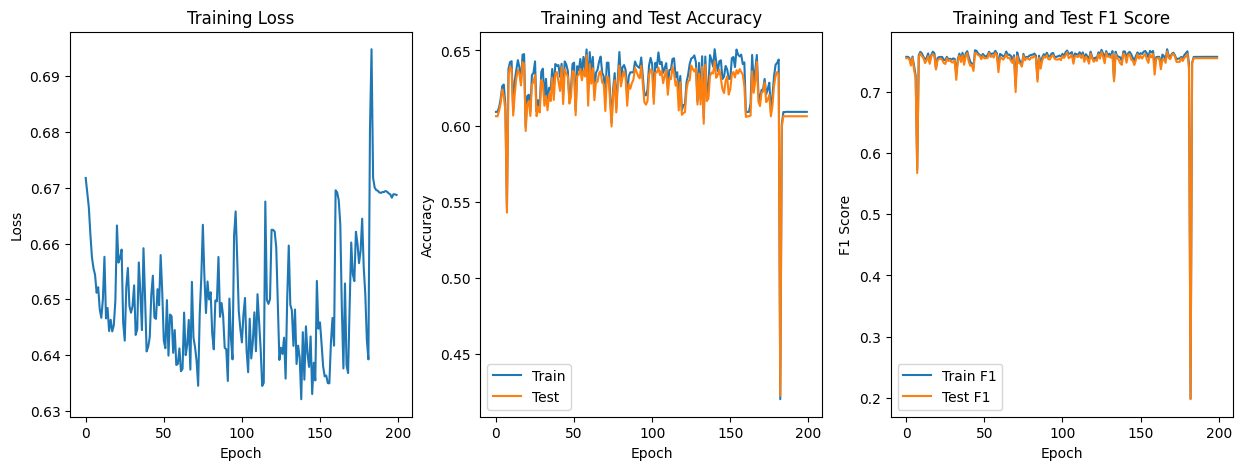

In [12]:
model = RNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_aro, test_loader_aro, 200,device)



Epoch 1: loss: 0.5455, train accuracy: 0.7667, train F1: 0.8680, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 2: loss: 0.5415, train accuracy: 0.7667, train F1: 0.8680, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 3: loss: 0.5380, train accuracy: 0.7675, train F1: 0.8683, valid accuracy: 0.7733, valid F1: 0.8721
Epoch 4: loss: 0.5349, train accuracy: 0.7702, train F1: 0.8692, valid accuracy: 0.7764, valid F1: 0.8731
Epoch 5: loss: 0.5337, train accuracy: 0.7709, train F1: 0.8699, valid accuracy: 0.7766, valid F1: 0.8736
Epoch 6: loss: 0.5316, train accuracy: 0.7703, train F1: 0.8686, valid accuracy: 0.7771, valid F1: 0.8729
Epoch 7: loss: 0.5306, train accuracy: 0.7725, train F1: 0.8705, valid accuracy: 0.7788, valid F1: 0.8745
Epoch 8: loss: 0.5343, train accuracy: 0.7698, train F1: 0.8694, valid accuracy: 0.7758, valid F1: 0.8732
Epoch 9: loss: 0.5299, train accuracy: 0.7753, train F1: 0.8720, valid accuracy: 0.7817, valid F1: 0.8760
Epoch 10: loss: 0.5274, train accuracy: 0.7746

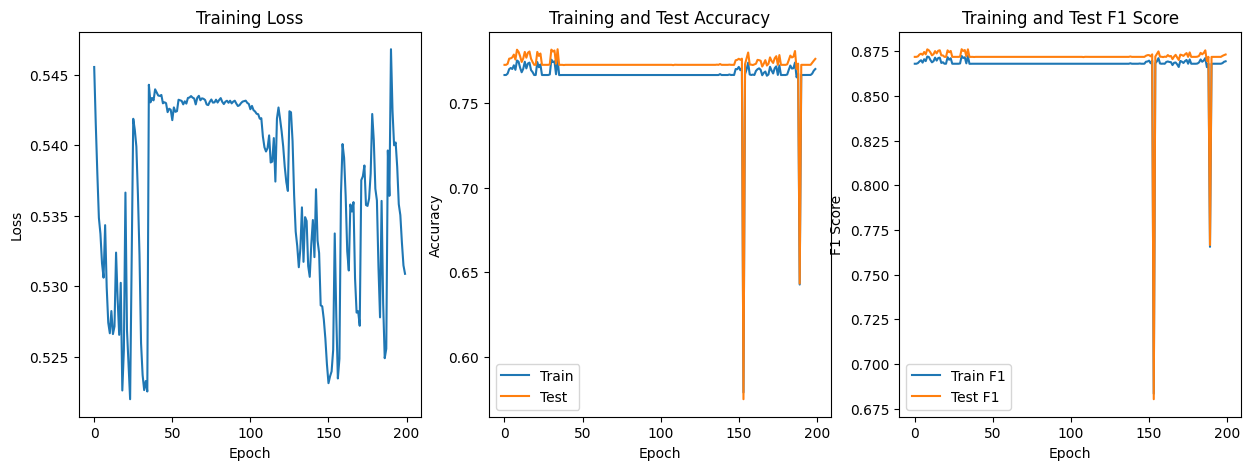

In [13]:
model = RNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_val, test_loader_val, 200,device)


Epoch 1: loss: 0.5049, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 2: loss: 0.5008, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 3: loss: 0.4997, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 4: loss: 0.4974, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 5: loss: 0.4955, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 6: loss: 0.4932, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 7: loss: 0.4950, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 8: loss: 0.4909, train accuracy: 0.7993, train F1: 0.8883, valid accuracy: 0.7991, valid F1: 0.8882
Epoch 9: loss: 0.4939, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 10: loss: 0.4923, train accuracy: 0.7993

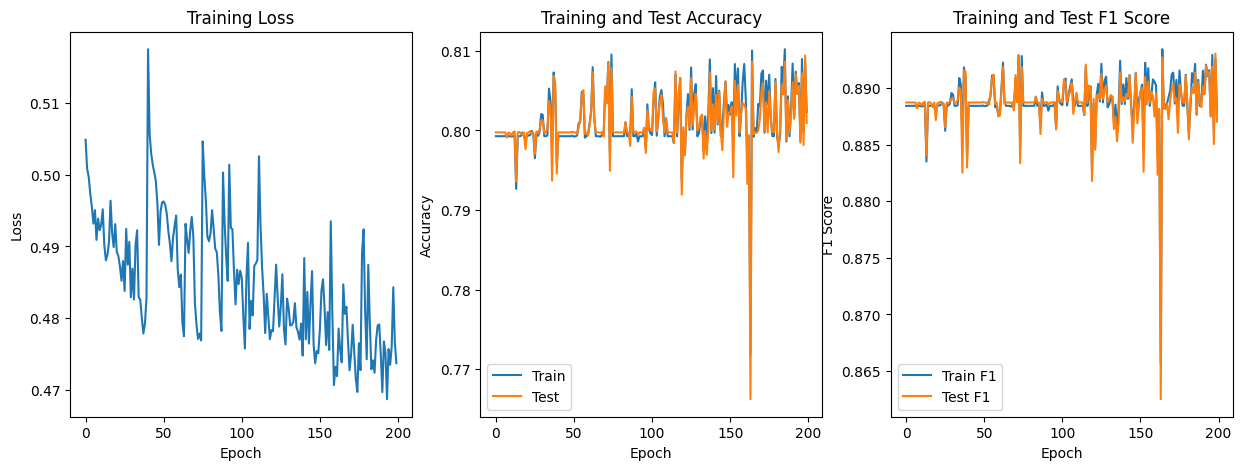

In [14]:
model = RNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_dom, test_loader_dom, 200,device)


Epoch 1: loss: 0.6729, train accuracy: 0.6095, train F1: 0.7573, valid accuracy: 0.6066, valid F1: 0.7551
Epoch 2: loss: 0.6699, train accuracy: 0.6095, train F1: 0.7574, valid accuracy: 0.6066, valid F1: 0.7551
Epoch 3: loss: 0.6690, train accuracy: 0.6097, train F1: 0.7573, valid accuracy: 0.6067, valid F1: 0.7550
Epoch 4: loss: 0.6662, train accuracy: 0.6135, train F1: 0.7504, valid accuracy: 0.6111, valid F1: 0.7474
Epoch 5: loss: 0.6610, train accuracy: 0.6287, train F1: 0.7591, valid accuracy: 0.6203, valid F1: 0.7536
Epoch 6: loss: 0.6641, train accuracy: 0.6096, train F1: 0.7574, valid accuracy: 0.6063, valid F1: 0.7548
Epoch 7: loss: 0.6689, train accuracy: 0.6095, train F1: 0.7574, valid accuracy: 0.6065, valid F1: 0.7551
Epoch 8: loss: 0.6658, train accuracy: 0.6095, train F1: 0.7572, valid accuracy: 0.6068, valid F1: 0.7551
Epoch 9: loss: 0.6595, train accuracy: 0.6101, train F1: 0.7575, valid accuracy: 0.6072, valid F1: 0.7553
Epoch 10: loss: 0.6563, train accuracy: 0.6195

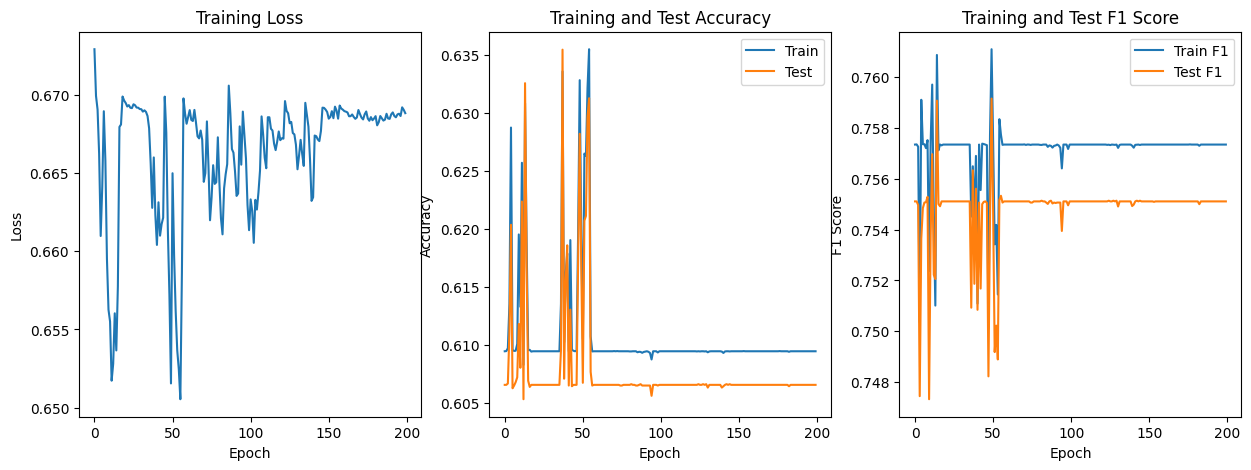

In [15]:
model = RNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_ica_aro, test_loader_ica_aro, 200,device)


Epoch 1: loss: 0.5459, train accuracy: 0.7667, train F1: 0.8679, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 2: loss: 0.5433, train accuracy: 0.7667, train F1: 0.8679, valid accuracy: 0.7726, valid F1: 0.8717
Epoch 3: loss: 0.5428, train accuracy: 0.7667, train F1: 0.8680, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 4: loss: 0.5423, train accuracy: 0.7667, train F1: 0.8680, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 5: loss: 0.5416, train accuracy: 0.7667, train F1: 0.8680, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 6: loss: 0.5412, train accuracy: 0.7667, train F1: 0.8680, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 7: loss: 0.5401, train accuracy: 0.7667, train F1: 0.8679, valid accuracy: 0.7728, valid F1: 0.8718
Epoch 8: loss: 0.5371, train accuracy: 0.7673, train F1: 0.8682, valid accuracy: 0.7730, valid F1: 0.8719
Epoch 9: loss: 0.5335, train accuracy: 0.7667, train F1: 0.8679, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 10: loss: 0.5319, train accuracy: 0.7779

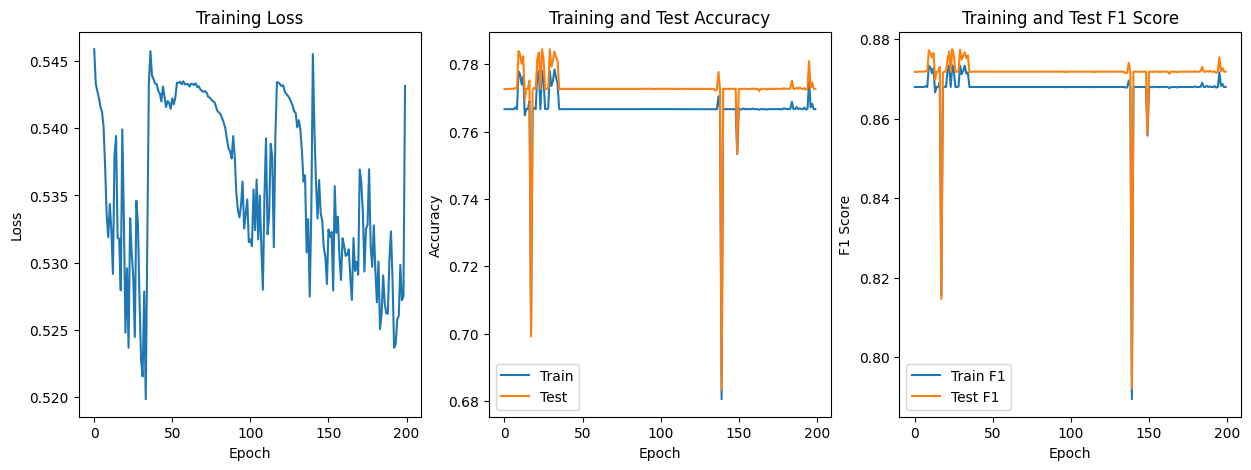

In [16]:
model = RNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_ica_val, test_loader_ica_val, 200,device)

Epoch 1: loss: 0.5053, train accuracy: 0.7993, train F1: 0.8885, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 2: loss: 0.5020, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7997, valid F1: 0.8887
Epoch 3: loss: 0.5012, train accuracy: 0.7993, train F1: 0.8885, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 4: loss: 0.4996, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 5: loss: 0.4974, train accuracy: 0.7997, train F1: 0.8886, valid accuracy: 0.7999, valid F1: 0.8887
Epoch 6: loss: 0.4956, train accuracy: 0.7998, train F1: 0.8887, valid accuracy: 0.8000, valid F1: 0.8888
Epoch 7: loss: 0.4992, train accuracy: 0.7992, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 8: loss: 0.4993, train accuracy: 0.7999, train F1: 0.8886, valid accuracy: 0.8005, valid F1: 0.8890
Epoch 9: loss: 0.4933, train accuracy: 0.8008, train F1: 0.8888, valid accuracy: 0.8005, valid F1: 0.8886
Epoch 10: loss: 0.5004, train accuracy: 0.7993

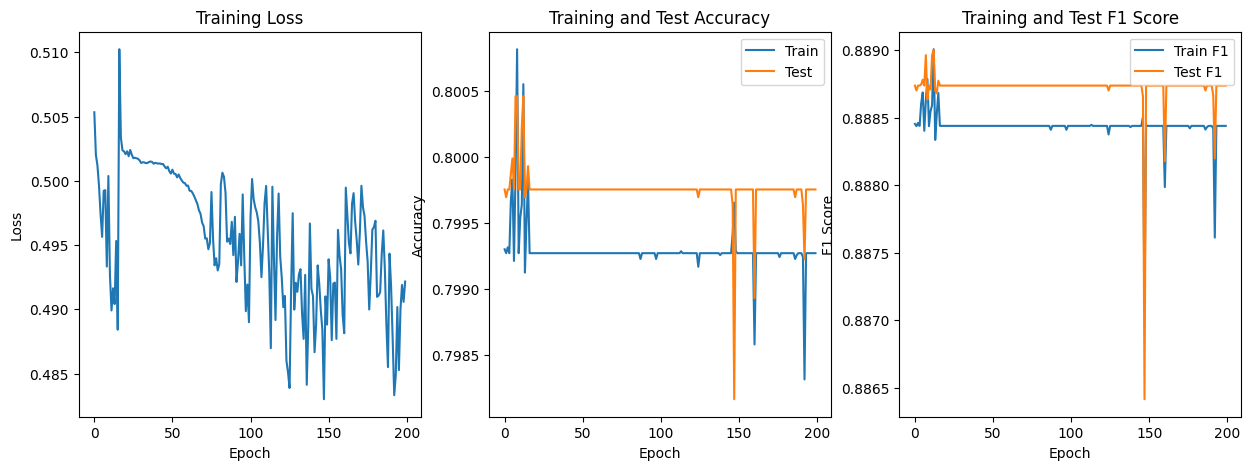

In [17]:
model = RNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_ica_dom, test_loader_ica_dom, 200,device)

In [18]:
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm_model = nn.LSTM(input_size=14, hidden_size=28, num_layers=2, batch_first=True,dropout=0.4)
        self.fc_model = nn.Sequential(
            nn.Linear(28, 1),  # Single output for binary classification
            nn.Sigmoid()  # Sigmoid activation for binary classification
        )
        

    def forward(self, x):
        rnn_out, hidden = self.lstm_model(x)  # rnn_out shape: (batch_size, sequence_length, hidden_size)
        last_output = rnn_out[:, -1, :]  # Get the last output for each sequence
        output = self.fc_model(last_output)  # Pass through fully connected layer
        
        return output

Epoch 1: loss: 0.6689, train accuracy: 0.6095, train F1: 0.7573, valid accuracy: 0.6066, valid F1: 0.7551
Epoch 2: loss: 0.6653, train accuracy: 0.6096, train F1: 0.7574, valid accuracy: 0.6067, valid F1: 0.7552
Epoch 3: loss: 0.6622, train accuracy: 0.5816, train F1: 0.6967, valid accuracy: 0.5793, valid F1: 0.6934
Epoch 4: loss: 0.6616, train accuracy: 0.6218, train F1: 0.7546, valid accuracy: 0.6158, valid F1: 0.7501
Epoch 5: loss: 0.6584, train accuracy: 0.6261, train F1: 0.7635, valid accuracy: 0.6221, valid F1: 0.7606
Epoch 6: loss: 0.6534, train accuracy: 0.6121, train F1: 0.7580, valid accuracy: 0.6077, valid F1: 0.7548
Epoch 7: loss: 0.6517, train accuracy: 0.6294, train F1: 0.7631, valid accuracy: 0.6245, valid F1: 0.7594
Epoch 8: loss: 0.6550, train accuracy: 0.6230, train F1: 0.7515, valid accuracy: 0.6219, valid F1: 0.7503
Epoch 9: loss: 0.6497, train accuracy: 0.6225, train F1: 0.7440, valid accuracy: 0.6194, valid F1: 0.7410
Epoch 10: loss: 0.6490, train accuracy: 0.6238

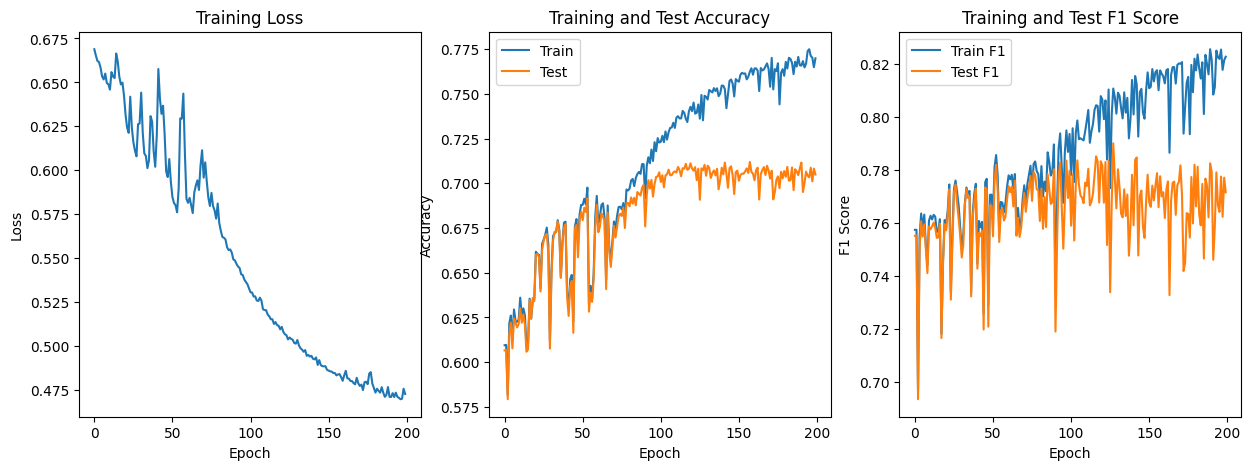

In [19]:
model = LSTM()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_aro, test_loader_aro, 200,device)

Epoch 1: loss: 0.5434, train accuracy: 0.7667, train F1: 0.8680, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 2: loss: 0.5361, train accuracy: 0.7667, train F1: 0.8680, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 3: loss: 0.5329, train accuracy: 0.7667, train F1: 0.8680, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 4: loss: 0.5309, train accuracy: 0.7667, train F1: 0.8680, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 5: loss: 0.5316, train accuracy: 0.7694, train F1: 0.8692, valid accuracy: 0.7757, valid F1: 0.8732
Epoch 6: loss: 0.5296, train accuracy: 0.7698, train F1: 0.8695, valid accuracy: 0.7765, valid F1: 0.8737
Epoch 7: loss: 0.5402, train accuracy: 0.7667, train F1: 0.8680, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 8: loss: 0.5353, train accuracy: 0.7667, train F1: 0.8680, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 9: loss: 0.5361, train accuracy: 0.7695, train F1: 0.8693, valid accuracy: 0.7757, valid F1: 0.8732
Epoch 10: loss: 0.5332, train accuracy: 0.7707

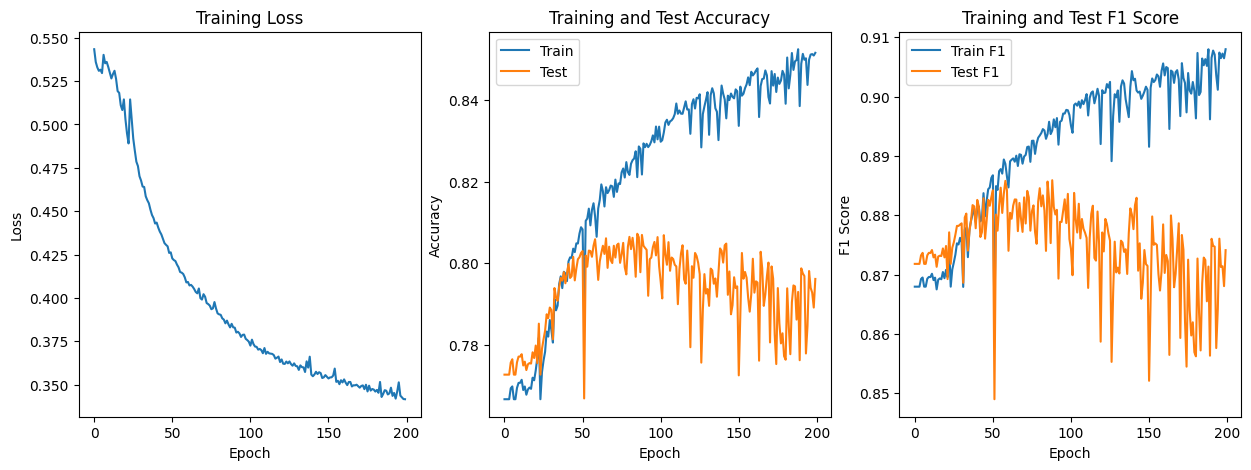

In [20]:
model = LSTM()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_val, test_loader_val, 200,device)

Epoch 1: loss: 0.5041, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 2: loss: 0.4983, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 3: loss: 0.4968, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 4: loss: 0.4961, train accuracy: 0.7993, train F1: 0.8885, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 5: loss: 0.4962, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 6: loss: 0.4942, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 7: loss: 0.4939, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 8: loss: 0.4945, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7995, valid F1: 0.8885
Epoch 9: loss: 0.4904, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 10: loss: 0.4870, train accuracy: 0.7993

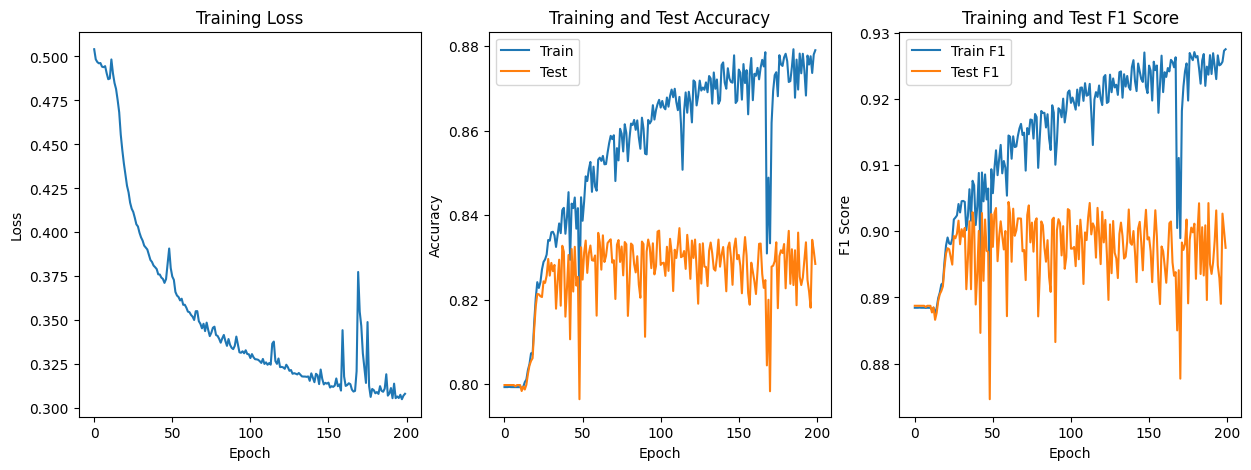

In [21]:
model = LSTM()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_dom, test_loader_dom, 200,device)

Epoch 1: loss: 0.6693, train accuracy: 0.6095, train F1: 0.7573, valid accuracy: 0.6066, valid F1: 0.7551
Epoch 2: loss: 0.6661, train accuracy: 0.6096, train F1: 0.7574, valid accuracy: 0.6064, valid F1: 0.7549
Epoch 3: loss: 0.6677, train accuracy: 0.6095, train F1: 0.7571, valid accuracy: 0.6059, valid F1: 0.7544
Epoch 4: loss: 0.6650, train accuracy: 0.6101, train F1: 0.7546, valid accuracy: 0.6071, valid F1: 0.7527
Epoch 5: loss: 0.6610, train accuracy: 0.6255, train F1: 0.7578, valid accuracy: 0.6254, valid F1: 0.7575
Epoch 6: loss: 0.6643, train accuracy: 0.6207, train F1: 0.7585, valid accuracy: 0.6196, valid F1: 0.7571
Epoch 7: loss: 0.6636, train accuracy: 0.6095, train F1: 0.7568, valid accuracy: 0.6065, valid F1: 0.7545
Epoch 8: loss: 0.6676, train accuracy: 0.6097, train F1: 0.7572, valid accuracy: 0.6067, valid F1: 0.7550
Epoch 9: loss: 0.6684, train accuracy: 0.6099, train F1: 0.7572, valid accuracy: 0.6066, valid F1: 0.7548
Epoch 10: loss: 0.6668, train accuracy: 0.6105

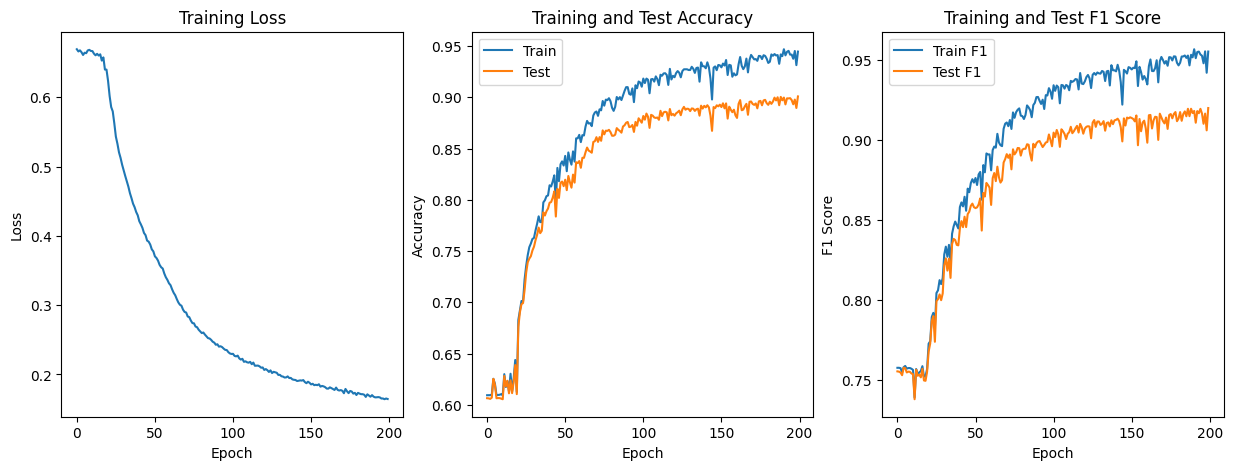

In [22]:
model = LSTM()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_ica_aro, test_loader_ica_aro, 200,device)

Epoch 1: loss: 0.5457, train accuracy: 0.7667, train F1: 0.8680, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 2: loss: 0.5404, train accuracy: 0.7667, train F1: 0.8680, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 3: loss: 0.5378, train accuracy: 0.7667, train F1: 0.8680, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 4: loss: 0.5425, train accuracy: 0.7667, train F1: 0.8680, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 5: loss: 0.5395, train accuracy: 0.7667, train F1: 0.8679, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 6: loss: 0.5372, train accuracy: 0.7667, train F1: 0.8680, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 7: loss: 0.5347, train accuracy: 0.7667, train F1: 0.8680, valid accuracy: 0.7728, valid F1: 0.8718
Epoch 8: loss: 0.5353, train accuracy: 0.7667, train F1: 0.8680, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 9: loss: 0.5407, train accuracy: 0.7667, train F1: 0.8680, valid accuracy: 0.7727, valid F1: 0.8718
Epoch 10: loss: 0.5418, train accuracy: 0.7667

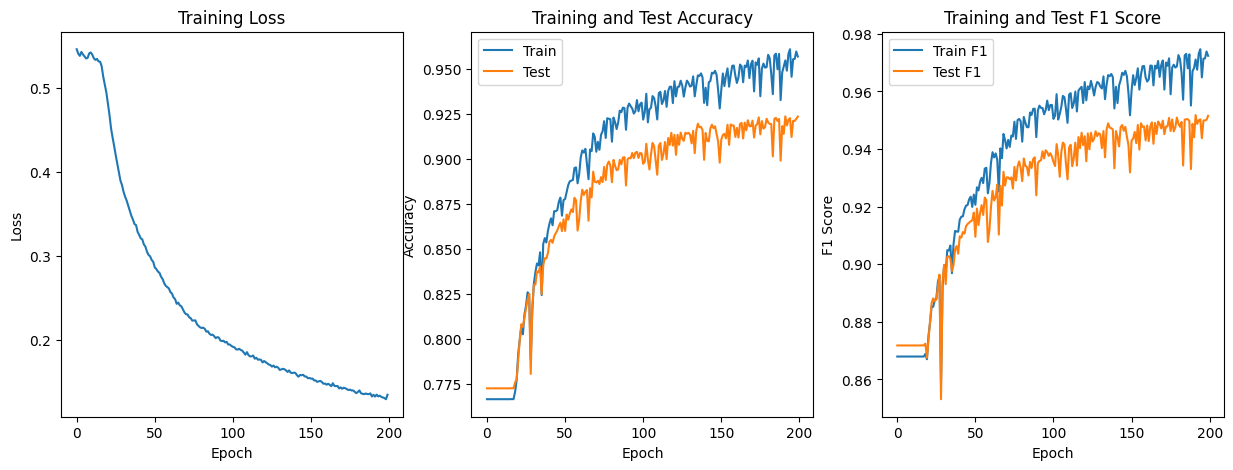

In [23]:
model = LSTM()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_ica_val, test_loader_ica_val, 200,device)

Epoch 1: loss: 0.5065, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 2: loss: 0.5003, train accuracy: 0.7994, train F1: 0.8885, valid accuracy: 0.7997, valid F1: 0.8887
Epoch 3: loss: 0.4986, train accuracy: 0.7993, train F1: 0.8885, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 4: loss: 0.4967, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 5: loss: 0.4962, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 6: loss: 0.4931, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 7: loss: 0.4991, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 8: loss: 0.4936, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 9: loss: 0.4834, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 10: loss: 0.4883, train accuracy: 0.7992

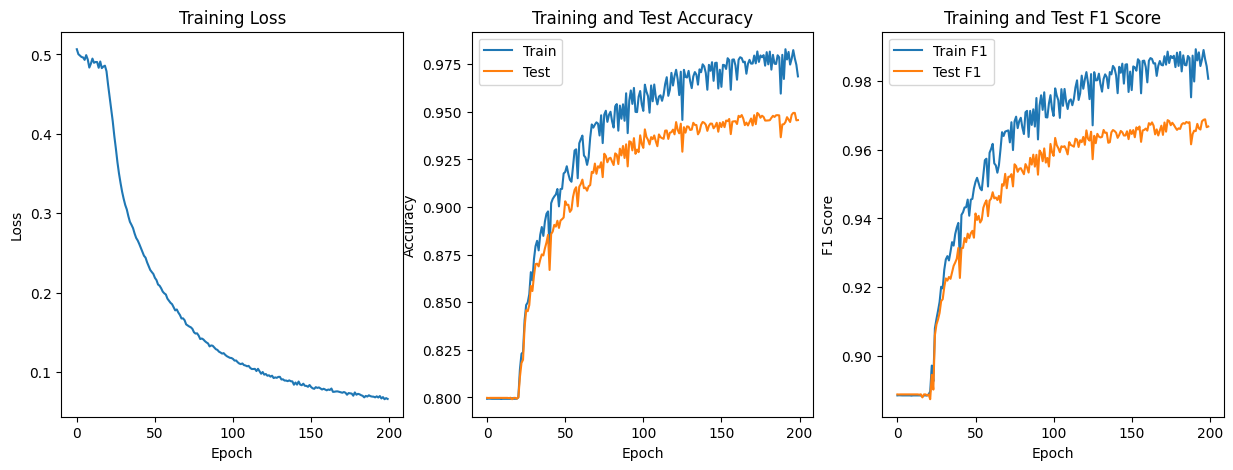

In [24]:
model = LSTM()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_ica_dom, test_loader_ica_dom, 200,device)

In [25]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.cnn_model = nn.Sequential(nn.Conv1d(14, 28, kernel_size = 5, stride=2),
                                   nn.ReLU(),
                                   nn.MaxPool1d(kernel_size = 2, stride = 2),
                                   nn.Dropout(0.2),
                                   nn.Conv1d(28,56, kernel_size = 5, stride = 2),
                                   nn.ReLU(),
                                   nn.MaxPool1d(kernel_size = 2, stride = 2),
                                   nn.Dropout(0.2))
                                  
    
    # alternatively use the Sequential container to run layers sequentially
    self.fc_model = nn.Sequential(nn.Linear(56*15, 56), nn.ReLU(),nn.Linear(56,1),nn.Sigmoid())


  def forward(self, x):
    
    # pass input via the CNN layers
   
    x = x.permute(0, 2, 1)
    x = self.cnn_model(x)
    # we reshape the tensor
    # we keep the first dimension (batch_size)
    # we let Pytorch compute the second dimension
    # (-1 means compute this dimension given the others)
    x =x.view(x.size(0), -1)
    # pass input via the fully-connected layers
    x = self.fc_model(x)

    return x

Epoch 1: loss: 0.6543, train accuracy: 0.6513, train F1: 0.7433, valid accuracy: 0.6508, valid F1: 0.7402
Epoch 2: loss: 0.6157, train accuracy: 0.6751, train F1: 0.7701, valid accuracy: 0.6731, valid F1: 0.7665
Epoch 3: loss: 0.5991, train accuracy: 0.6812, train F1: 0.7795, valid accuracy: 0.6799, valid F1: 0.7766
Epoch 4: loss: 0.5921, train accuracy: 0.6894, train F1: 0.7633, valid accuracy: 0.6819, valid F1: 0.7553
Epoch 5: loss: 0.5840, train accuracy: 0.6927, train F1: 0.7788, valid accuracy: 0.6864, valid F1: 0.7726
Epoch 6: loss: 0.5790, train accuracy: 0.6999, train F1: 0.7742, valid accuracy: 0.6902, valid F1: 0.7646
Epoch 7: loss: 0.5729, train accuracy: 0.6983, train F1: 0.7818, valid accuracy: 0.6881, valid F1: 0.7726
Epoch 8: loss: 0.5685, train accuracy: 0.7047, train F1: 0.7884, valid accuracy: 0.6939, valid F1: 0.7792
Epoch 9: loss: 0.5656, train accuracy: 0.7058, train F1: 0.7904, valid accuracy: 0.6932, valid F1: 0.7799
Epoch 10: loss: 0.5624, train accuracy: 0.7139

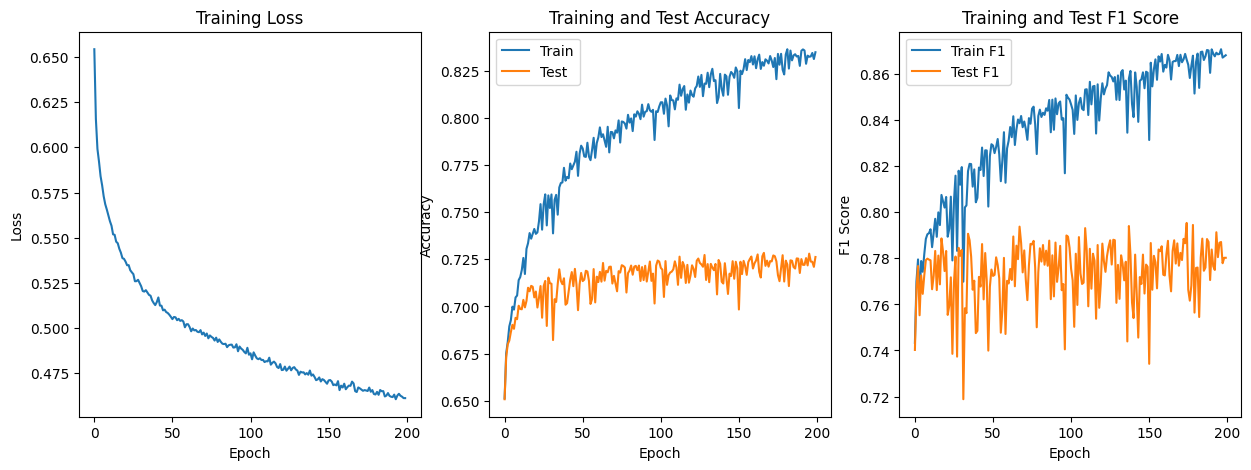

In [26]:
model = CNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_aro, test_loader_aro, 200,device)

Epoch 1: loss: 0.5219, train accuracy: 0.7832, train F1: 0.8746, valid accuracy: 0.7874, valid F1: 0.8773
Epoch 2: loss: 0.4870, train accuracy: 0.7863, train F1: 0.8768, valid accuracy: 0.7923, valid F1: 0.8807
Epoch 3: loss: 0.4746, train accuracy: 0.7893, train F1: 0.8738, valid accuracy: 0.7928, valid F1: 0.8764
Epoch 4: loss: 0.4652, train accuracy: 0.7939, train F1: 0.8799, valid accuracy: 0.7989, valid F1: 0.8832
Epoch 5: loss: 0.4590, train accuracy: 0.7977, train F1: 0.8810, valid accuracy: 0.8016, valid F1: 0.8837
Epoch 6: loss: 0.4540, train accuracy: 0.7979, train F1: 0.8822, valid accuracy: 0.8008, valid F1: 0.8842
Epoch 7: loss: 0.4501, train accuracy: 0.7993, train F1: 0.8830, valid accuracy: 0.8030, valid F1: 0.8855
Epoch 8: loss: 0.4468, train accuracy: 0.8030, train F1: 0.8839, valid accuracy: 0.8035, valid F1: 0.8847
Epoch 9: loss: 0.4414, train accuracy: 0.8075, train F1: 0.8865, valid accuracy: 0.8054, valid F1: 0.8858
Epoch 10: loss: 0.4372, train accuracy: 0.8092

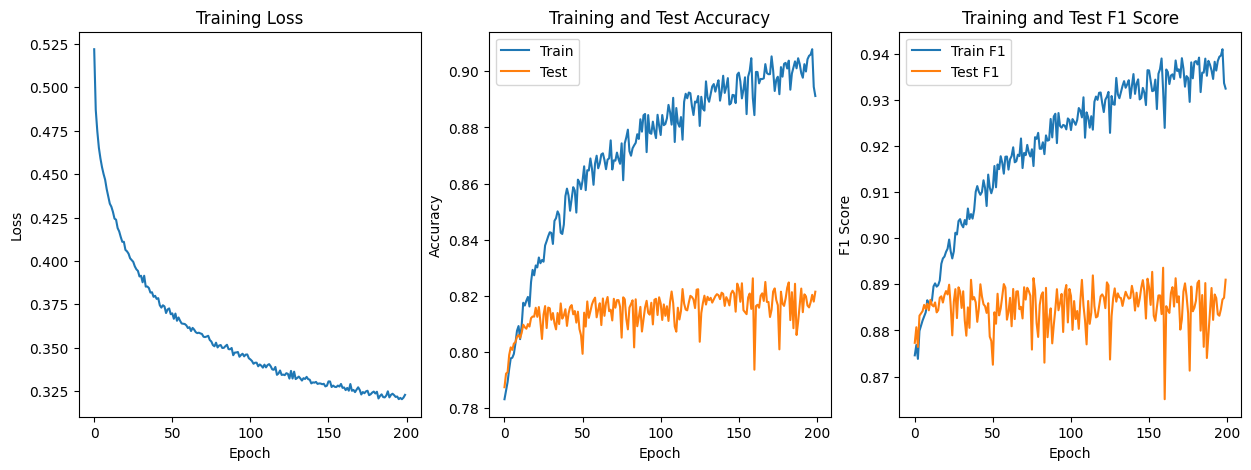

In [27]:
model = CNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_val, test_loader_val, 200,device)

Epoch 1: loss: 0.4860, train accuracy: 0.8027, train F1: 0.8901, valid accuracy: 0.8030, valid F1: 0.8903
Epoch 2: loss: 0.4561, train accuracy: 0.8120, train F1: 0.8940, valid accuracy: 0.8090, valid F1: 0.8922
Epoch 3: loss: 0.4426, train accuracy: 0.8177, train F1: 0.8969, valid accuracy: 0.8159, valid F1: 0.8959
Epoch 4: loss: 0.4334, train accuracy: 0.8166, train F1: 0.8967, valid accuracy: 0.8159, valid F1: 0.8963
Epoch 5: loss: 0.4255, train accuracy: 0.8250, train F1: 0.8999, valid accuracy: 0.8208, valid F1: 0.8974
Epoch 6: loss: 0.4178, train accuracy: 0.8287, train F1: 0.9012, valid accuracy: 0.8240, valid F1: 0.8984
Epoch 7: loss: 0.4119, train accuracy: 0.8278, train F1: 0.8984, valid accuracy: 0.8197, valid F1: 0.8935
Epoch 8: loss: 0.4058, train accuracy: 0.8294, train F1: 0.9025, valid accuracy: 0.8252, valid F1: 0.9001
Epoch 9: loss: 0.4036, train accuracy: 0.8342, train F1: 0.9040, valid accuracy: 0.8255, valid F1: 0.8990
Epoch 10: loss: 0.3990, train accuracy: 0.8401

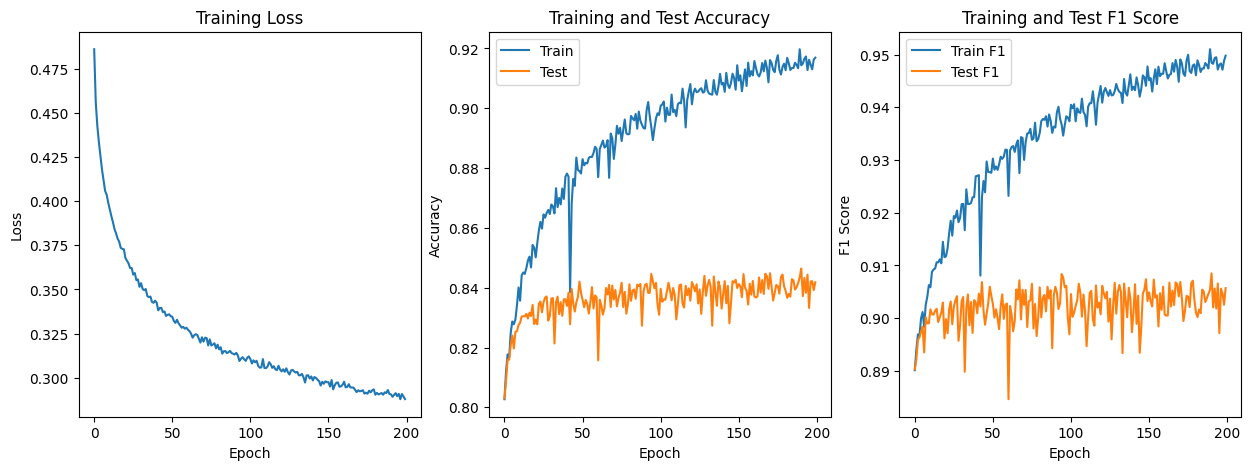

In [28]:
model = CNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_dom, test_loader_dom, 200,device)

Epoch 1: loss: 0.6184, train accuracy: 0.7529, train F1: 0.8032, valid accuracy: 0.7444, valid F1: 0.7955
Epoch 2: loss: 0.5026, train accuracy: 0.7834, train F1: 0.8381, valid accuracy: 0.7697, valid F1: 0.8273
Epoch 3: loss: 0.4733, train accuracy: 0.8012, train F1: 0.8443, valid accuracy: 0.7893, valid F1: 0.8342
Epoch 4: loss: 0.4564, train accuracy: 0.7967, train F1: 0.8502, valid accuracy: 0.7845, valid F1: 0.8410
Epoch 5: loss: 0.4433, train accuracy: 0.8117, train F1: 0.8478, valid accuracy: 0.7982, valid F1: 0.8358
Epoch 6: loss: 0.4297, train accuracy: 0.8188, train F1: 0.8525, valid accuracy: 0.8018, valid F1: 0.8374
Epoch 7: loss: 0.4146, train accuracy: 0.8339, train F1: 0.8748, valid accuracy: 0.8175, valid F1: 0.8626
Epoch 8: loss: 0.3951, train accuracy: 0.8374, train F1: 0.8775, valid accuracy: 0.8257, valid F1: 0.8687
Epoch 9: loss: 0.3840, train accuracy: 0.8531, train F1: 0.8776, valid accuracy: 0.8360, valid F1: 0.8629
Epoch 10: loss: 0.3708, train accuracy: 0.8477

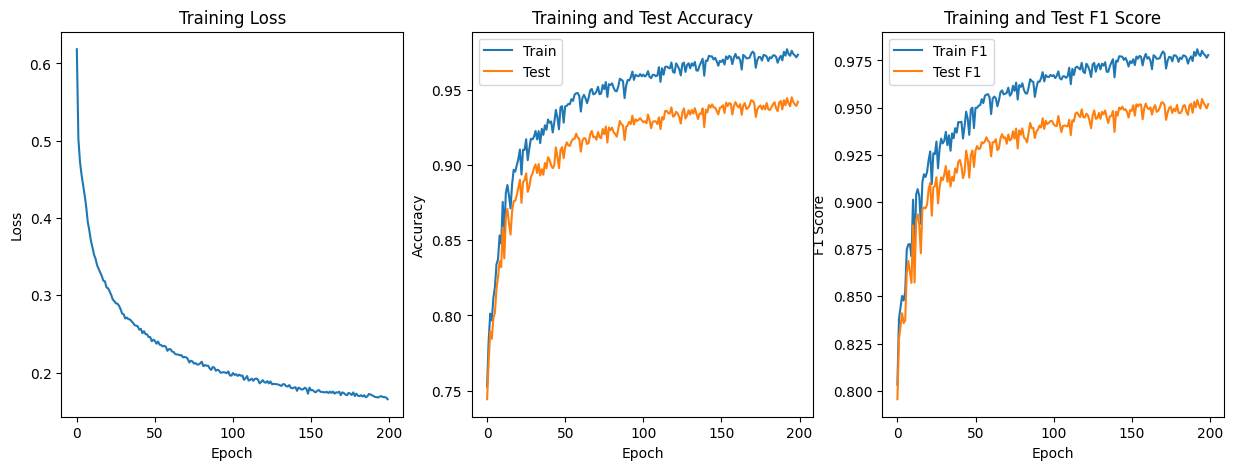

In [29]:
model = CNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_ica_aro, test_loader_ica_aro, 200,device)

Epoch 1: loss: 0.5051, train accuracy: 0.8112, train F1: 0.8873, valid accuracy: 0.8145, valid F1: 0.8897
Epoch 2: loss: 0.4207, train accuracy: 0.8348, train F1: 0.8976, valid accuracy: 0.8337, valid F1: 0.8973
Epoch 3: loss: 0.3931, train accuracy: 0.8430, train F1: 0.9034, valid accuracy: 0.8397, valid F1: 0.9018
Epoch 4: loss: 0.3803, train accuracy: 0.8472, train F1: 0.9067, valid accuracy: 0.8474, valid F1: 0.9073
Epoch 5: loss: 0.3690, train accuracy: 0.8538, train F1: 0.9084, valid accuracy: 0.8467, valid F1: 0.9045
Epoch 6: loss: 0.3599, train accuracy: 0.8426, train F1: 0.9058, valid accuracy: 0.8444, valid F1: 0.9072
Epoch 7: loss: 0.3507, train accuracy: 0.8585, train F1: 0.9132, valid accuracy: 0.8564, valid F1: 0.9125
Epoch 8: loss: 0.3400, train accuracy: 0.8778, train F1: 0.9230, valid accuracy: 0.8689, valid F1: 0.9182
Epoch 9: loss: 0.3249, train accuracy: 0.8686, train F1: 0.9201, valid accuracy: 0.8636, valid F1: 0.9176
Epoch 10: loss: 0.3144, train accuracy: 0.8970

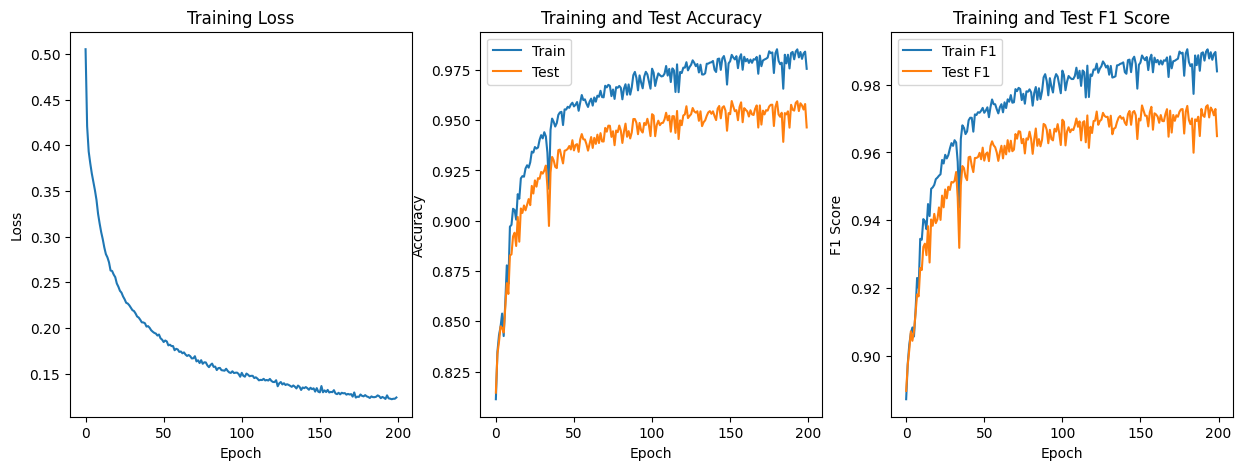

In [30]:
model = CNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_ica_val, test_loader_ica_val, 200,device)

Epoch 1: loss: 0.4631, train accuracy: 0.8446, train F1: 0.9097, valid accuracy: 0.8415, valid F1: 0.9081
Epoch 2: loss: 0.3753, train accuracy: 0.8612, train F1: 0.9158, valid accuracy: 0.8520, valid F1: 0.9103
Epoch 3: loss: 0.3519, train accuracy: 0.8699, train F1: 0.9222, valid accuracy: 0.8628, valid F1: 0.9181
Epoch 4: loss: 0.3410, train accuracy: 0.8721, train F1: 0.9215, valid accuracy: 0.8625, valid F1: 0.9158
Epoch 5: loss: 0.3314, train accuracy: 0.8717, train F1: 0.9203, valid accuracy: 0.8626, valid F1: 0.9148
Epoch 6: loss: 0.3230, train accuracy: 0.8834, train F1: 0.9297, valid accuracy: 0.8727, valid F1: 0.9234
Epoch 7: loss: 0.3156, train accuracy: 0.8851, train F1: 0.9312, valid accuracy: 0.8752, valid F1: 0.9255
Epoch 8: loss: 0.3121, train accuracy: 0.8769, train F1: 0.9223, valid accuracy: 0.8607, valid F1: 0.9124
Epoch 9: loss: 0.3060, train accuracy: 0.8902, train F1: 0.9343, valid accuracy: 0.8783, valid F1: 0.9274
Epoch 10: loss: 0.2993, train accuracy: 0.8929

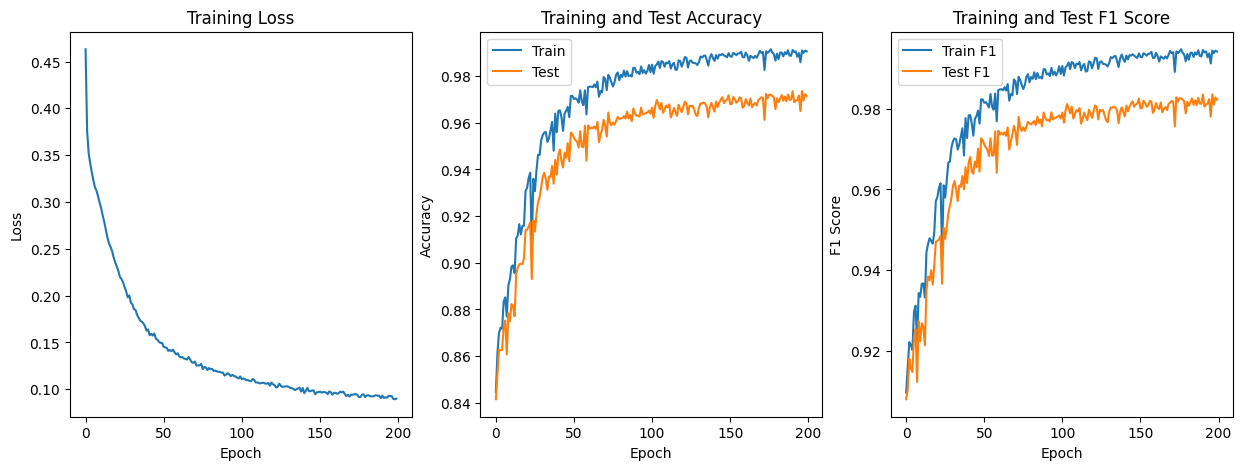

In [31]:
model = CNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_ica_dom, test_loader_ica_dom, 200,device)

In [42]:
import torch.nn.functional as F

In [43]:

import torch.nn.functional as F

class TransformerEncoder(nn.Module):
    def __init__(self, input_dim, num_heads, ff_dim, dropout=0.25):
        super(TransformerEncoder, self).__init__()
        self.norm1 = nn.LayerNorm(input_dim)
        self.attention = nn.MultiheadAttention(input_dim, num_heads, dropout=dropout)
        self.dropout1 = nn.Dropout(dropout)
        self.norm2 = nn.LayerNorm(input_dim)
        self.fc1 = nn.Linear(input_dim, ff_dim)
        self.dropout2 = nn.Dropout(dropout)
        self.fc2 = nn.Linear(ff_dim, input_dim)
    
    def forward(self, inputs):
        # Self-Attention block
        x = self.norm1(inputs)
        attn_output, _ = self.attention(x, x, x)
        x = self.dropout1(attn_output)
        res = x + inputs  # Residual connection

        # Feed-forward block
        x = self.norm2(res)
        x = nn.ReLU()(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        
        # Return the final output with residual connection
        return x + res

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_heads, ff_dim, num_blocks, mlp_units, mlp_dropout, dropout):
        super(TransformerModel, self).__init__()
        
        self.encoder_blocks = nn.ModuleList(
            [TransformerEncoder(input_dim, num_heads, ff_dim, dropout) for _ in range(num_blocks)]
        )
        
        # MLP Layer after the transformer blocks
        self.mlp = nn.Sequential(
            nn.Linear(input_dim, mlp_units),
            nn.ReLU(),
            nn.Dropout(mlp_dropout),
            nn.Linear(mlp_units, 1),
            nn.Sigmoid()# Output size of 1 (assuming binary classification or regression)
        )
    
    def forward(self, x):
        # Reshape input to (sequence_length, batch_size, input_dim)
        x = x.permute(1, 0, 2)  # Change from (batch_size, sequence_length, input_dim) to (sequence_length, batch_size, input_dim)
        
        for encoder in self.encoder_blocks:
            x = encoder(x)
        
        # Reshape back to (batch_size, sequence_length, input_dim)
        x = x.permute(1, 0, 2)
        
        # Global Average Pooling over the sequence length
        x = x.mean(dim=1)
        
        # Pass through the MLP
        x = self.mlp(x)
        
        return x

# Initialize the model with your parameters
input_dim = 14
num_heads = 2
ff_dim = 28  # Increased to allow more complexity
num_transformer_blocks = 4
mlp_units = 56
mlp_dropout = 0.4
dropout = 0.25



Epoch 1: loss: 0.6522, train accuracy: 0.6472, train F1: 0.7578, valid accuracy: 0.6422, valid F1: 0.7537
Epoch 2: loss: 0.6194, train accuracy: 0.6530, train F1: 0.7702, valid accuracy: 0.6484, valid F1: 0.7664
Epoch 3: loss: 0.6089, train accuracy: 0.6588, train F1: 0.7545, valid accuracy: 0.6577, valid F1: 0.7525
Epoch 4: loss: 0.5975, train accuracy: 0.6658, train F1: 0.7680, valid accuracy: 0.6634, valid F1: 0.7653
Epoch 5: loss: 0.5936, train accuracy: 0.6672, train F1: 0.7764, valid accuracy: 0.6614, valid F1: 0.7718
Epoch 6: loss: 0.5896, train accuracy: 0.6744, train F1: 0.7758, valid accuracy: 0.6673, valid F1: 0.7703
Epoch 7: loss: 0.5856, train accuracy: 0.6687, train F1: 0.7771, valid accuracy: 0.6645, valid F1: 0.7737
Epoch 8: loss: 0.5831, train accuracy: 0.6768, train F1: 0.7679, valid accuracy: 0.6692, valid F1: 0.7613
Epoch 9: loss: 0.5806, train accuracy: 0.6763, train F1: 0.7790, valid accuracy: 0.6693, valid F1: 0.7736
Epoch 10: loss: 0.5782, train accuracy: 0.6812

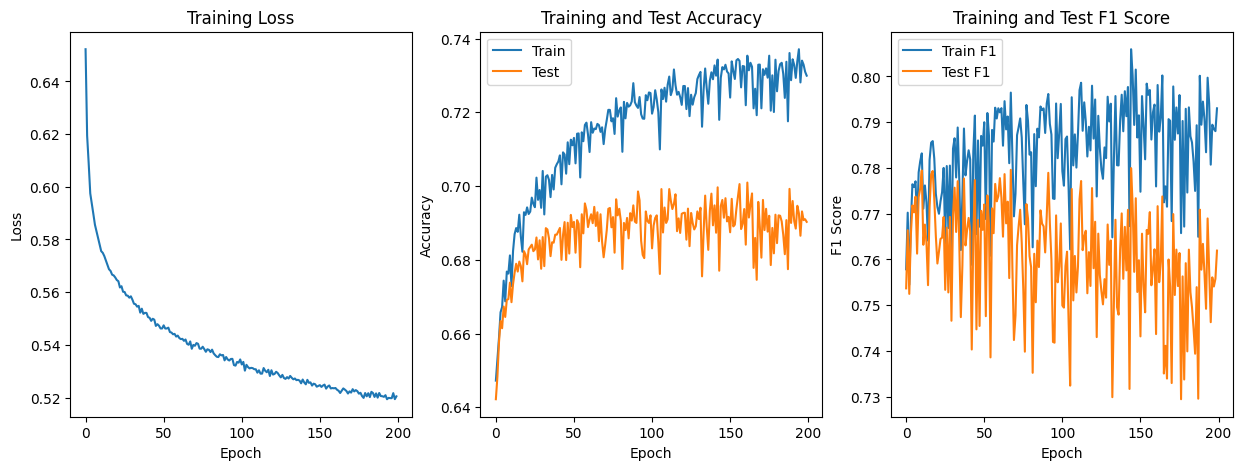

In [44]:
model = TransformerModel(input_dim, num_heads, ff_dim, num_transformer_blocks, mlp_units, mlp_dropout, dropout)
# Apply weight initialization
model.apply(init_weights)

loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_aro, test_loader_aro, 200, device)


Epoch 1: loss: 0.5374, train accuracy: 0.7760, train F1: 0.8721, valid accuracy: 0.7828, valid F1: 0.8764
Epoch 2: loss: 0.5108, train accuracy: 0.7815, train F1: 0.8738, valid accuracy: 0.7887, valid F1: 0.8783
Epoch 3: loss: 0.4998, train accuracy: 0.7833, train F1: 0.8754, valid accuracy: 0.7891, valid F1: 0.8791
Epoch 4: loss: 0.4910, train accuracy: 0.7862, train F1: 0.8768, valid accuracy: 0.7930, valid F1: 0.8811
Epoch 5: loss: 0.4848, train accuracy: 0.7863, train F1: 0.8766, valid accuracy: 0.7934, valid F1: 0.8810
Epoch 6: loss: 0.4811, train accuracy: 0.7858, train F1: 0.8752, valid accuracy: 0.7915, valid F1: 0.8789
Epoch 7: loss: 0.4774, train accuracy: 0.7876, train F1: 0.8775, valid accuracy: 0.7939, valid F1: 0.8815
Epoch 8: loss: 0.4734, train accuracy: 0.7881, train F1: 0.8764, valid accuracy: 0.7932, valid F1: 0.8798
Epoch 9: loss: 0.4711, train accuracy: 0.7884, train F1: 0.8750, valid accuracy: 0.7910, valid F1: 0.8771
Epoch 10: loss: 0.4677, train accuracy: 0.7882

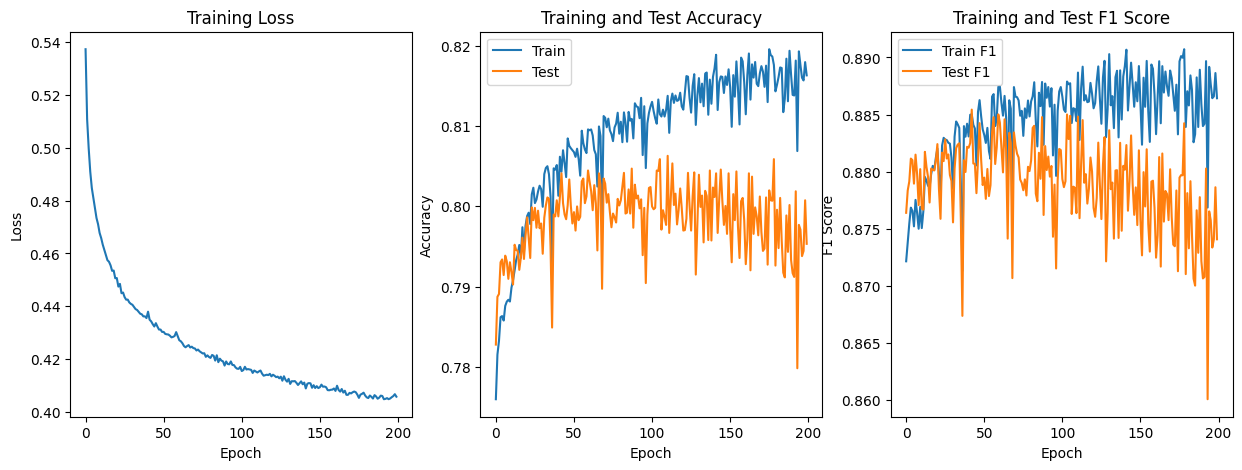

In [45]:
model = TransformerModel(input_dim, num_heads, ff_dim, num_transformer_blocks, mlp_units, mlp_dropout, dropout)
# Apply weight initialization
model.apply(init_weights)

loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_val, test_loader_val, 200, device)


Epoch 1: loss: 0.4922, train accuracy: 0.8086, train F1: 0.8916, valid accuracy: 0.8085, valid F1: 0.8916
Epoch 2: loss: 0.4678, train accuracy: 0.8142, train F1: 0.8949, valid accuracy: 0.8138, valid F1: 0.8946
Epoch 3: loss: 0.4556, train accuracy: 0.8140, train F1: 0.8946, valid accuracy: 0.8131, valid F1: 0.8941
Epoch 4: loss: 0.4497, train accuracy: 0.8176, train F1: 0.8966, valid accuracy: 0.8155, valid F1: 0.8955
Epoch 5: loss: 0.4443, train accuracy: 0.8176, train F1: 0.8963, valid accuracy: 0.8164, valid F1: 0.8957
Epoch 6: loss: 0.4402, train accuracy: 0.8178, train F1: 0.8962, valid accuracy: 0.8162, valid F1: 0.8953
Epoch 7: loss: 0.4364, train accuracy: 0.8169, train F1: 0.8955, valid accuracy: 0.8149, valid F1: 0.8944
Epoch 8: loss: 0.4336, train accuracy: 0.8131, train F1: 0.8916, valid accuracy: 0.8091, valid F1: 0.8894
Epoch 9: loss: 0.4307, train accuracy: 0.8205, train F1: 0.8987, valid accuracy: 0.8195, valid F1: 0.8981
Epoch 10: loss: 0.4286, train accuracy: 0.8215

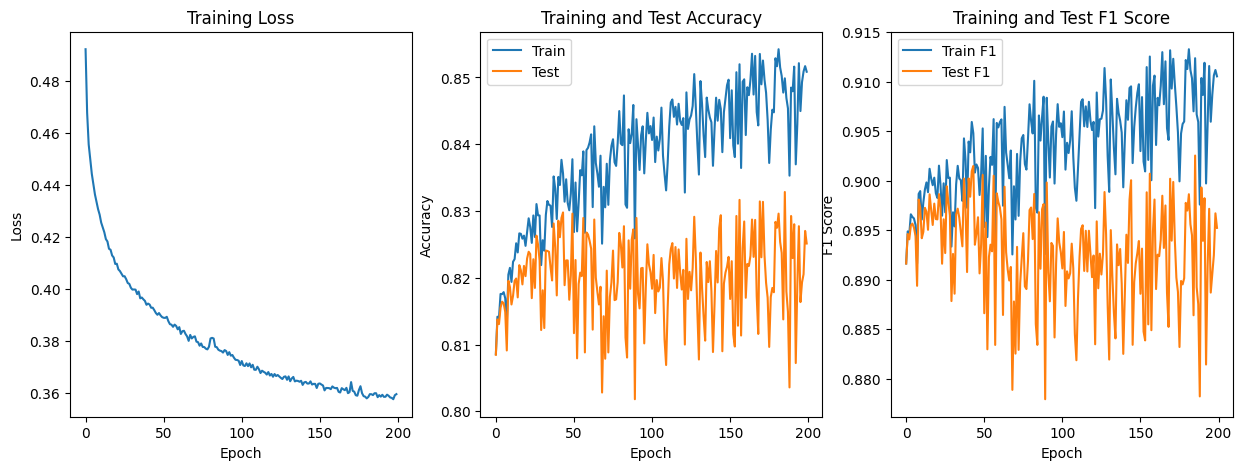

In [46]:
model = TransformerModel(input_dim, num_heads, ff_dim, num_transformer_blocks, mlp_units, mlp_dropout, dropout)
# Apply weight initialization
model.apply(init_weights)

loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_dom, test_loader_dom, 200, device)


Epoch 1: loss: 0.6485, train accuracy: 0.6696, train F1: 0.7499, valid accuracy: 0.6745, valid F1: 0.7527
Epoch 2: loss: 0.6044, train accuracy: 0.7029, train F1: 0.7486, valid accuracy: 0.7034, valid F1: 0.7485
Epoch 3: loss: 0.5673, train accuracy: 0.7444, train F1: 0.8000, valid accuracy: 0.7405, valid F1: 0.7958
Epoch 4: loss: 0.5426, train accuracy: 0.7598, train F1: 0.8114, valid accuracy: 0.7515, valid F1: 0.8037
Epoch 5: loss: 0.5252, train accuracy: 0.7612, train F1: 0.8045, valid accuracy: 0.7544, valid F1: 0.7984
Epoch 6: loss: 0.5107, train accuracy: 0.7560, train F1: 0.7948, valid accuracy: 0.7482, valid F1: 0.7878
Epoch 7: loss: 0.4983, train accuracy: 0.7724, train F1: 0.8317, valid accuracy: 0.7634, valid F1: 0.8249
Epoch 8: loss: 0.4918, train accuracy: 0.7818, train F1: 0.8264, valid accuracy: 0.7687, valid F1: 0.8157
Epoch 9: loss: 0.4790, train accuracy: 0.7868, train F1: 0.8379, valid accuracy: 0.7743, valid F1: 0.8286
Epoch 10: loss: 0.4720, train accuracy: 0.7860

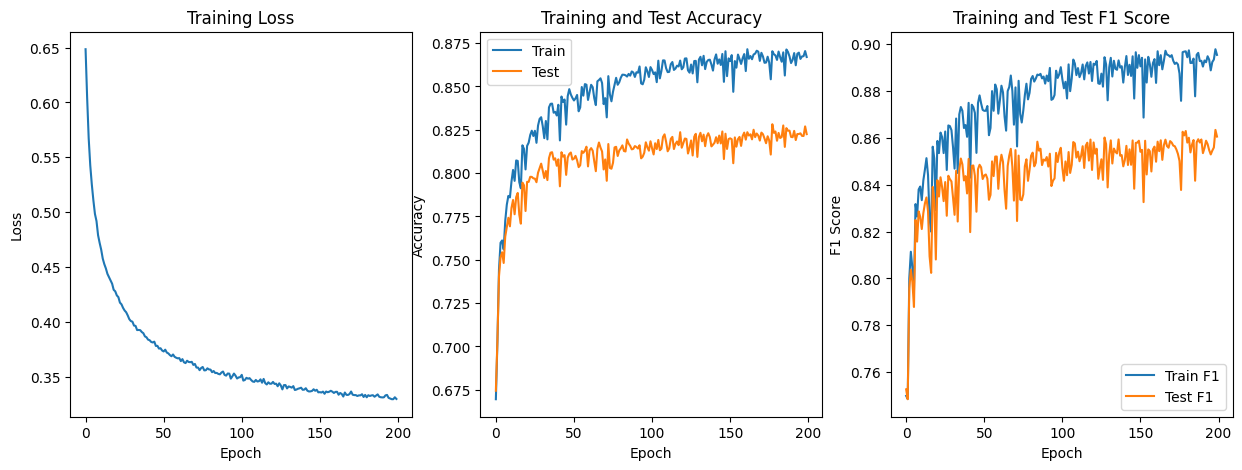

In [47]:
model = TransformerModel(input_dim, num_heads, ff_dim, num_transformer_blocks, mlp_units, mlp_dropout, dropout)
# Apply weight initialization
model.apply(init_weights)

loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_ica_aro, test_loader_ica_aro, 200, device)


Epoch 1: loss: 0.5311, train accuracy: 0.7680, train F1: 0.8657, valid accuracy: 0.7743, valid F1: 0.8697
Epoch 2: loss: 0.4979, train accuracy: 0.7822, train F1: 0.8697, valid accuracy: 0.7861, valid F1: 0.8726
Epoch 3: loss: 0.4729, train accuracy: 0.7953, train F1: 0.8759, valid accuracy: 0.7928, valid F1: 0.8751
Epoch 4: loss: 0.4557, train accuracy: 0.7888, train F1: 0.8619, valid accuracy: 0.7829, valid F1: 0.8588
Epoch 5: loss: 0.4386, train accuracy: 0.8122, train F1: 0.8816, valid accuracy: 0.8076, valid F1: 0.8796
Epoch 6: loss: 0.4287, train accuracy: 0.8233, train F1: 0.8901, valid accuracy: 0.8144, valid F1: 0.8852
Epoch 7: loss: 0.4173, train accuracy: 0.8264, train F1: 0.8937, valid accuracy: 0.8198, valid F1: 0.8903
Epoch 8: loss: 0.4087, train accuracy: 0.8324, train F1: 0.8953, valid accuracy: 0.8233, valid F1: 0.8904
Epoch 9: loss: 0.4018, train accuracy: 0.8365, train F1: 0.8976, valid accuracy: 0.8253, valid F1: 0.8915
Epoch 10: loss: 0.3951, train accuracy: 0.8414

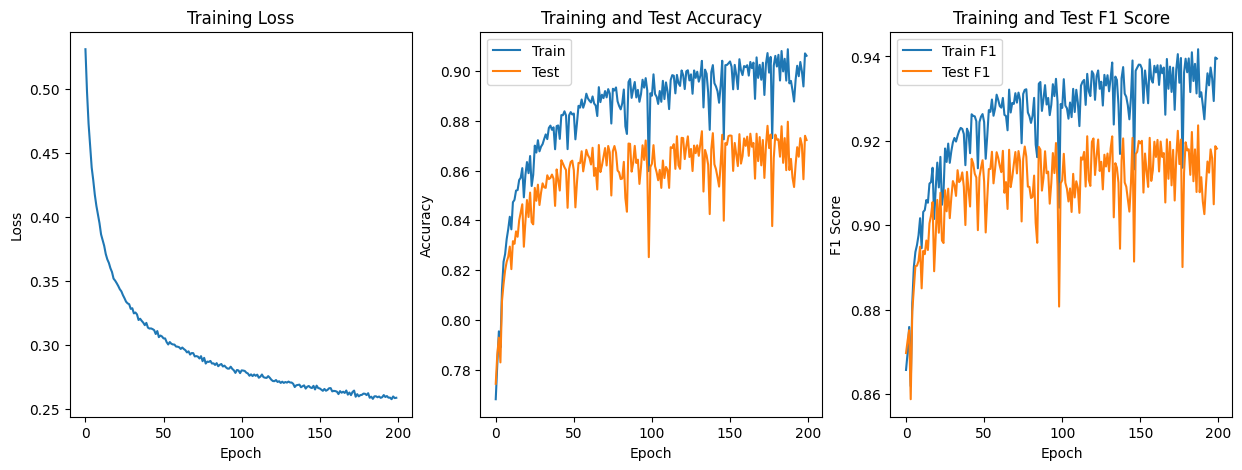

In [48]:
model = TransformerModel(input_dim, num_heads, ff_dim, num_transformer_blocks, mlp_units, mlp_dropout, dropout)
# Apply weight initialization
model.apply(init_weights)

loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_ica_val, test_loader_ica_val, 200, device)

Epoch 1: loss: 0.5006, train accuracy: 0.7993, train F1: 0.8884, valid accuracy: 0.7998, valid F1: 0.8887
Epoch 2: loss: 0.4657, train accuracy: 0.8055, train F1: 0.8898, valid accuracy: 0.8027, valid F1: 0.8883
Epoch 3: loss: 0.4408, train accuracy: 0.8220, train F1: 0.8973, valid accuracy: 0.8199, valid F1: 0.8962
Epoch 4: loss: 0.4172, train accuracy: 0.8324, train F1: 0.9023, valid accuracy: 0.8271, valid F1: 0.8993
Epoch 5: loss: 0.4011, train accuracy: 0.8437, train F1: 0.9073, valid accuracy: 0.8346, valid F1: 0.9020
Epoch 6: loss: 0.3885, train accuracy: 0.8486, train F1: 0.9110, valid accuracy: 0.8378, valid F1: 0.9047
Epoch 7: loss: 0.3790, train accuracy: 0.8476, train F1: 0.9062, valid accuracy: 0.8346, valid F1: 0.8981
Epoch 8: loss: 0.3698, train accuracy: 0.8466, train F1: 0.9043, valid accuracy: 0.8345, valid F1: 0.8968
Epoch 9: loss: 0.3655, train accuracy: 0.8526, train F1: 0.9086, valid accuracy: 0.8382, valid F1: 0.8997
Epoch 10: loss: 0.3608, train accuracy: 0.8443

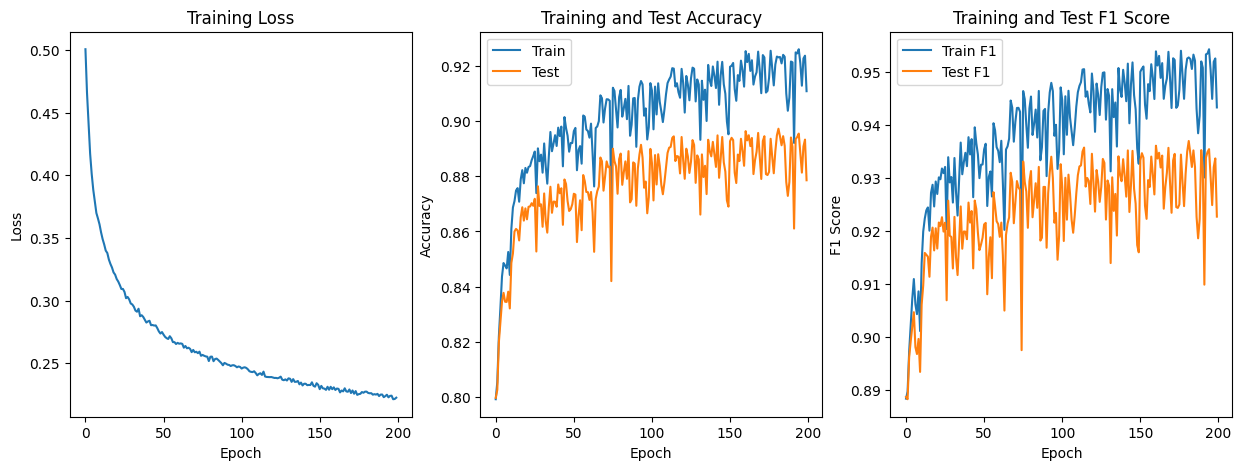

In [49]:
model = TransformerModel(input_dim, num_heads, ff_dim, num_transformer_blocks, mlp_units, mlp_dropout, dropout)
# Apply weight initialization
model.apply(init_weights)

loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_ica_dom, test_loader_ica_dom, 200, device)